# Spotify Song Popularity Predictor
## Dataset located in Kaggle: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/data

#### Problem: I am trying to solve the problem of predicting the popularity of songs on Spotify based on various factors. I want to identify the patterns and factors that contribute to a song's success and popularity. This can help artists, producers, and the music industry make informed decisions on how to make a song chart highly in Spotify.

##### Data Cleaning and Initial Understanding of Data

In [1]:
import pandas as pd
import chardet

# Load the dataset with specified encoding
file_path = r'/Users/maychan/Downloads/spotify-2023.csv'

with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())

data = pd.read_csv(file_path, encoding=result['encoding'])

# Display the first few rows to understand the structure of the data
print(data.head())


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spot

In [2]:
# Understanding data types and structure of the columns
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In this case, I want to focus on the audio features, such as the danceability, etc., that can influence the number of streams. 

Artist names and title doesn't generalize well to new, unseen tracks and artists.

In [3]:
# Drop columns 'track_name' and 'artist(s)_name'
data.drop(['track_name', 'artist(s)_name'], axis=1, inplace=True)

In [4]:
# Check for missing values after initial imputation
print(data.isnull().sum())

# Drop records with Nulls
data.dropna(inplace=True)

artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [5]:
# Check for missing values after dropping records with Nulls
print(data.isnull().sum())
# Display the first few rows of the cleaned data
print(data.head())

artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64
   artist_count  released_year  released_month  released_day  \
0             2           2023               7            14   
1             1           2023               3            23   
2             1           2023               6            30   
3             1           2019               8            23   
4             1           2023               5            18   

   in_spotify_playlists  in_sp

### What is the relationship between key and streams?

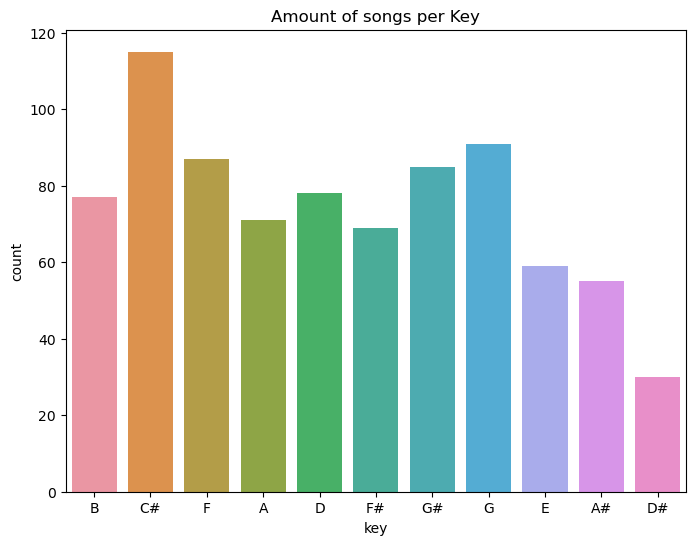

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x="key", data=data)
plt.title("Amount of songs per Key", fontsize=12)
plt.show()

C# key songs have the most streams.

### What is the relationship between mode and streams?

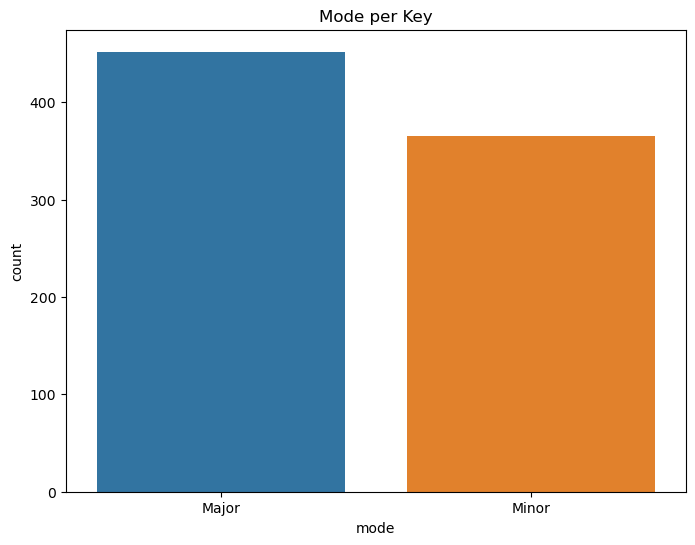

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x="mode", data=data)
plt.title("Mode per Key", fontsize=12)
plt.show()

Major mode songs have the most streams.

The 'key' column represents categorical data, containing musical key information, such as A, B, C#.

The 'mode' column represents categorical data, indicating wether a song is in a major or minor key.

In [8]:
data['key'] = data['key'].astype('category')
data['mode'] = data['mode'].astype('category')

#Check data types after data conversion 
print(data.dtypes)


artist_count               int64
released_year              int64
released_month             int64
released_day               int64
in_spotify_playlists       int64
in_spotify_charts          int64
streams                   object
in_apple_playlists         int64
in_apple_charts            int64
in_deezer_playlists       object
in_deezer_charts           int64
in_shazam_charts          object
bpm                        int64
key                     category
mode                    category
danceability_%             int64
valence_%                  int64
energy_%                   int64
acousticness_%             int64
instrumentalness_%         int64
liveness_%                 int64
speechiness_%              int64
dtype: object


The columns 'streams', 'in_deezer_playlists' and 'in_shazam_charts' columns represent numerical data but is read as string due to formatting issues.

The column 'streams' displays the total number of streams on Spotify.

The column 'in_deezer_playlists' displays the number of Deezer playlists the song is included in.

The column 'in_shazam_charts' displays the presence and rank of the song on Shazam charts.

In [9]:
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')
data = data.dropna(subset=['streams'])
data['in_deezer_playlists'] = pd.to_numeric(data['in_deezer_playlists'], errors='coerce')
data = data.dropna(subset=['in_deezer_playlists'])
data['in_shazam_charts'] = pd.to_numeric(data['in_shazam_charts'], errors='coerce')
data = data.dropna(subset=['in_shazam_charts'])
#Check data types after data conversion 
print(data.dtypes)

artist_count               int64
released_year              int64
released_month             int64
released_day               int64
in_spotify_playlists       int64
in_spotify_charts          int64
streams                  float64
in_apple_playlists         int64
in_apple_charts            int64
in_deezer_playlists      float64
in_deezer_charts           int64
in_shazam_charts         float64
bpm                        int64
key                     category
mode                    category
danceability_%             int64
valence_%                  int64
energy_%                   int64
acousticness_%             int64
instrumentalness_%         int64
liveness_%                 int64
speechiness_%              int64
dtype: object


In [10]:
#One-hot encoding to prevent assumption about the ordinality of categories. There's no meaningful order.
data_encoded = pd.get_dummies(data, columns=['key', 'mode'])


Feature Scaling to ensure that the model isn't influenced by larger features abnormally.

In [11]:
#Making sure that the data is normalized
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = data_encoded.select_dtypes(include=['int64', 'float64']).columns
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])


In [12]:
# Find Outliers
numerical_columns = data_encoded.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_columns:
    Q1 = data_encoded[column].quantile(0.25)
    Q3 = data_encoded[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data_encoded[(data_encoded[column] < lower_bound) | (data_encoded[column] > upper_bound)]
    print(f"Outliers in {column}: {len(outliers)}")


Outliers in artist_count: 24
Outliers in released_year: 114
Outliers in released_month: 0
Outliers in released_day: 0
Outliers in in_spotify_playlists: 64
Outliers in in_spotify_charts: 67
Outliers in streams: 54
Outliers in in_apple_playlists: 52
Outliers in in_apple_charts: 12
Outliers in in_deezer_playlists: 90
Outliers in in_deezer_charts: 152
Outliers in in_shazam_charts: 111
Outliers in bpm: 1
Outliers in danceability_%: 3
Outliers in valence_%: 0
Outliers in energy_%: 2
Outliers in acousticness_%: 1
Outliers in instrumentalness_%: 71
Outliers in liveness_%: 35
Outliers in speechiness_%: 96


In [13]:
# remove outliers
data_no_outliers = data_encoded[~((data_encoded[column] < lower_bound) | (data_encoded[column] > upper_bound))]


##### Feature Engineering: Creating a new field, streams per playlist. This can help provide a measure of the song's popularity to its presence in Spotify playlists. A higher ratio indicates that the song is garnering more streams per playlist, suggesting high engagement or interest from users.

In [14]:
#Feature Engineering
data_no_outliers.loc[:, 'streams_per_playlist'] = data_no_outliers['streams'] / data_no_outliers['in_spotify_playlists']


/var/folders/b8/vljb59q56ld9lyw50h_5dlgc0000gp/T/ipykernel_21539/49481996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers.loc[:, 'streams_per_playlist'] = data_no_outliers['streams'] / data_no_outliers['in_spotify_playlists']


#### Correlation

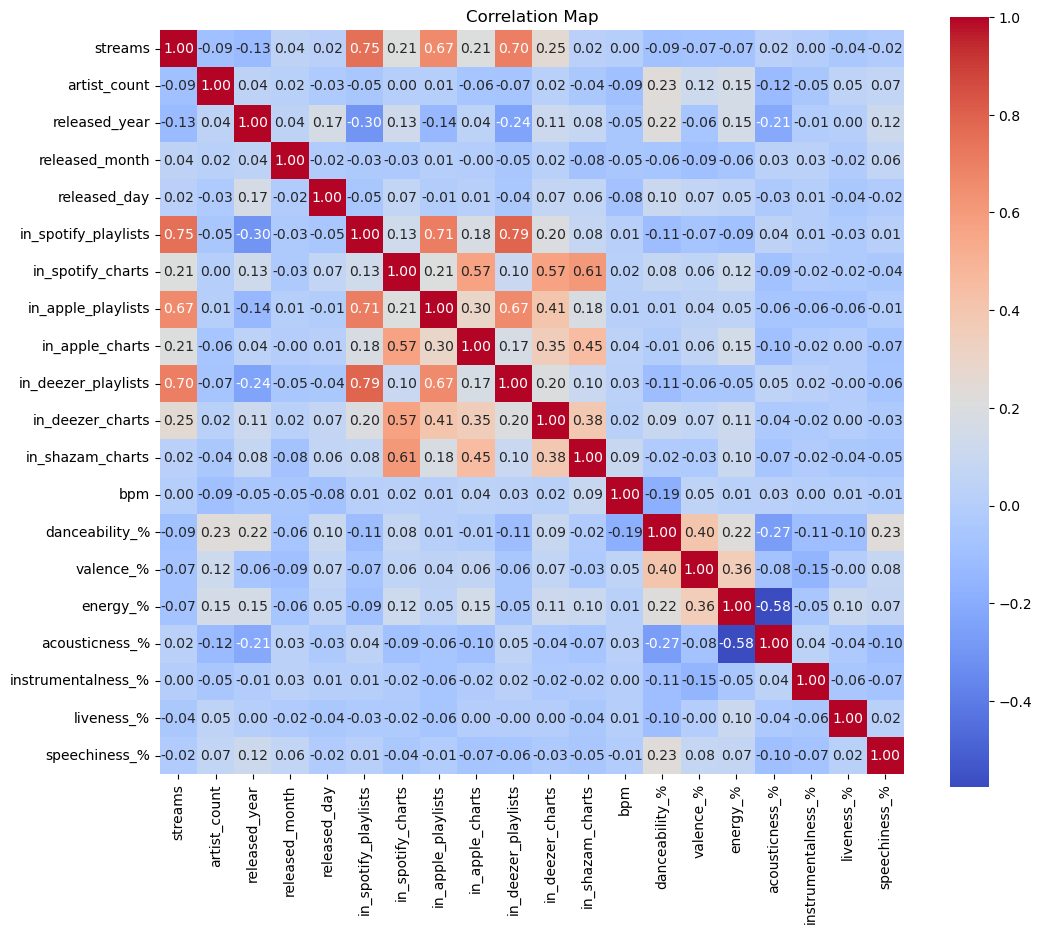

In [15]:
correlate = ['streams', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']


correlation_matrix = data_no_outliers[correlate].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

plt.title("Correlation Map")
plt.show()

There's a high positive correlation between the playlist, such as in_deezer_charts, and streams.

##### Separating data into testing and training data sets

Standardization ensures that all features are on a similar scale, making sure that each feature contribute equally to the model. 

Without normalization, different scaled features can lead to the model assigning higher importance to larger features.

In [16]:
from sklearn.model_selection import train_test_split
# Features and target variable
X = data_no_outliers.drop(['streams', 'streams_per_playlist'], axis=1)  # Exclude the target variable and the derived feature
y = data_no_outliers['streams']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Check for NaN values in the features and target variable before fitting the model
print("NaN values in X_train:", X_train.isnull().sum().sum())
print("NaN values in y_train:", y_train.isnull().sum())

NaN values in X_train: 0
NaN values in y_train: 0


### Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (Linear Regression): {mse}')
print(f'R-squared (Linear Regression): {r2}')

Mean Squared Error (Linear Regression): 0.3301271307672382
R-squared (Linear Regression): 0.4807461796912512


### Random Forest Regressor

In [18]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R-squared (Random Forest): {r2_rf}')


Mean Squared Error (Random Forest): 0.18804076179941598
R-squared (Random Forest): 0.7042324764063165


### Gradient Boosting Regressor

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)  

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the Gradient Boosting Regressor model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Mean Squared Error (Gradient Boosting Regressor): {mse_gb}')
print(f'R-squared (Gradient Boosting Regressor): {r2_gb}')


Mean Squared Error (Gradient Boosting Regressor): 0.1817998308830847
R-squared (Gradient Boosting Regressor): 0.7140487772146038


### Support Vector Regressor

In [20]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Support Vector Regressor model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)  

# Fit the model to the training data
svr_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate the Support Vector Regressor model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'Mean Squared Error (SVR): {mse_svr}')
print(f'R-squared (SVR): {r2_svr}')


Mean Squared Error (SVR): 0.3014518134337155
R-squared (SVR): 0.5258493132610143


### K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# K-Nearest Neighbors Regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)  

# Fit the model to the training data
knn_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the K-Nearest Neighbors Regressor model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f'Mean Squared Error (KNN): {mse_knn}')
print(f'R-squared (KNN): {r2_knn}')

